In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP/Project/jsbach_chorals_harmony.data')

In [ ]:
Y = df['Chord label']
Y

0       F_M
1       C_M
2       C_M
3       F_M
4       F_M
       ... 
5660    G_m
5661    G_m
5662    C_M
5663    C_M
5664    F_M
Name: Chord label, Length: 5665, dtype: object

In [ ]:
df

,Choral ID,Event number,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
5661,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
5662,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M
5663,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M


In [ ]:
class ele:
	def _init_(self):

		self.count = 0
		self.index = 0
		self.val = 0


def mycomp(a):
	return a.val

def mycomp2(a):
	return (a.count, -a.index)


def sortByFrequency(arr, n,):
	element = [None for _ in range(n)]
	for i in range(n):
		element[i] = ele()
		element[i].index = i
		element[i].count = 0
		element[i].val = arr[i]
	element.sort(key=mycomp)
	element[0].count = 1

	for i in range(1, n):
		if (element[i].val == element[i - 1].val):
			element[i].count += element[i - 1].count + 1
			element[i - 1].count = -1
			element[i].index = element[i - 1].index
		else:
			element[i].count = 1

	element.sort(key=mycomp2)

	index = 0
	for i in range(n - 1, -1, -1):
		if (element[i].count != -1):
			for j in range(element[i].count):
				arr[index] = element[i].val
				index += 1

plt_array = Y.tolist()
sortByFrequency(plt_array, len(plt_array))

# This code is contributed by phasing17 from geeksforgeeks.com

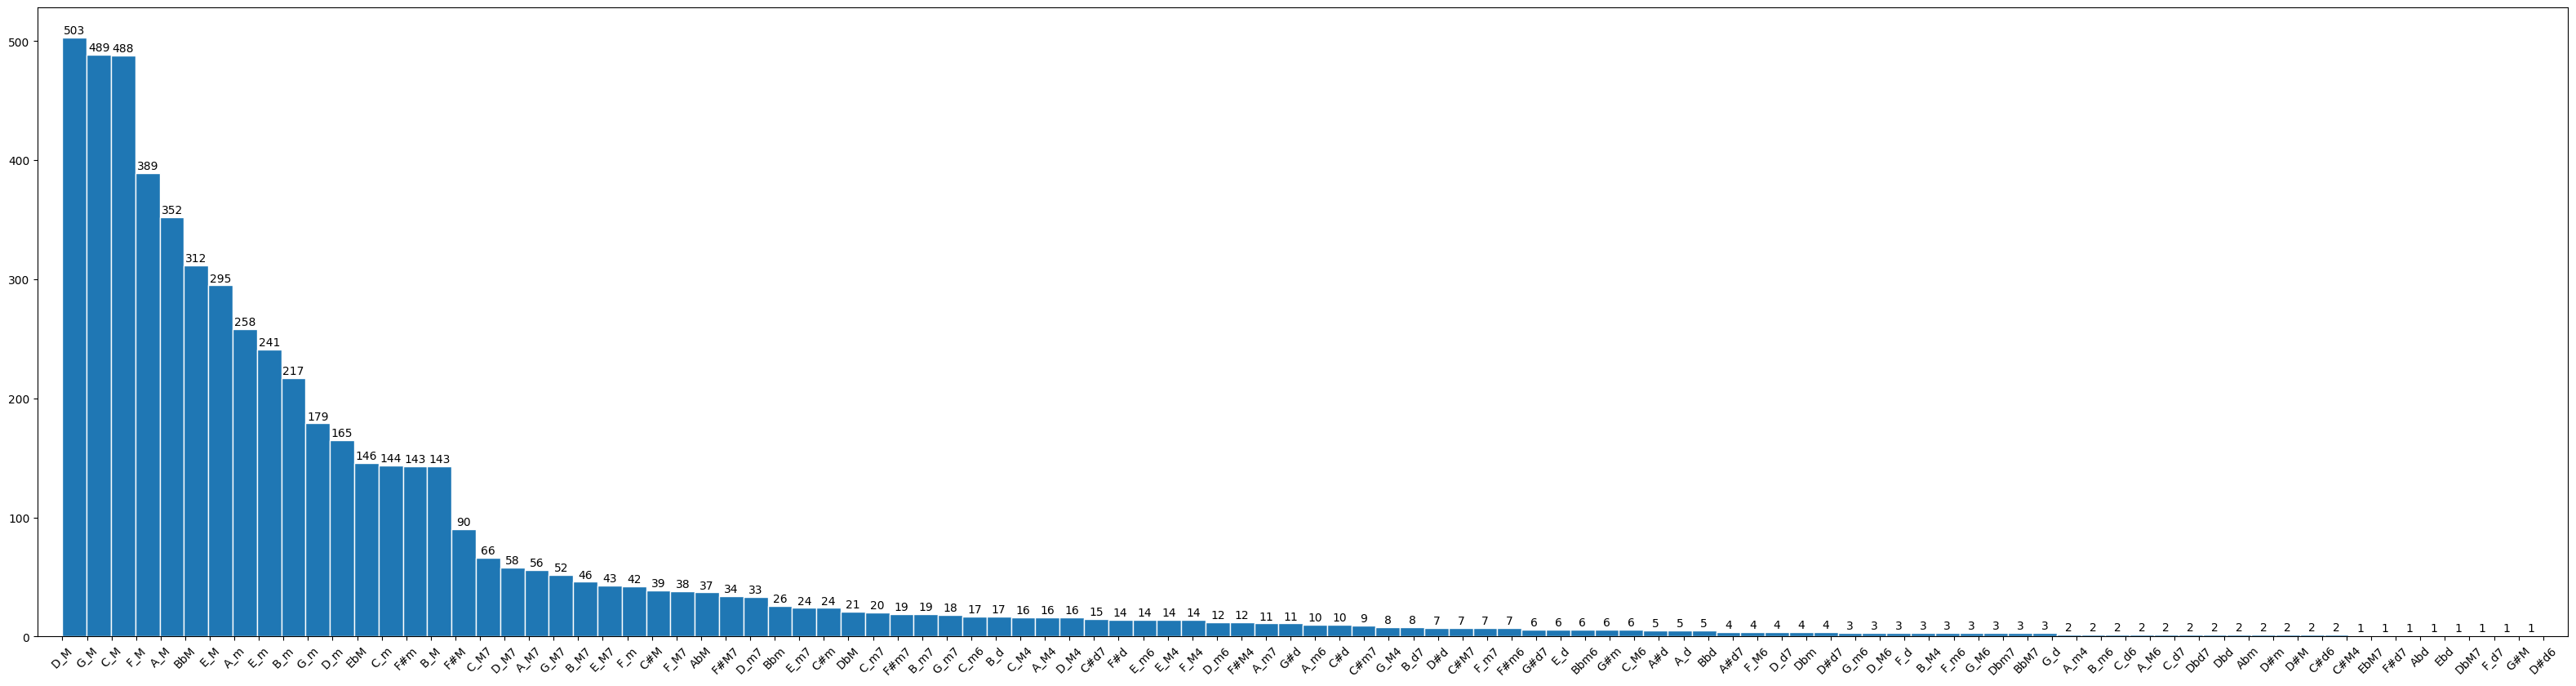

In [ ]:
from pandas.core.arrays.categorical import Ordered
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
plt.margins(x=0.01)
freq, bins, _ = plt.hist(pd.Series(plt_array), edgecolor='white', bins=pd.Series(plt_array).unique().size)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,1),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
plt.show()

In [ ]:
classes = pd.Series(plt_array).unique()
discarded_classes = []

for x in range(len(classes)):
  if freq[x] <= 20:
    for i in range(len(df)):
      if df.iloc[i]['Chord label'] == classes[x]:
        discarded_classes.append(i)

In [ ]:
len(discarded_classes)

472

In [ ]:
df.shape

(5665, 17)

In [ ]:
df.drop(discarded_classes, inplace=True)
df.shape

(5193, 17)

In [ ]:
Y = df['Chord label']
Y.shape

(5193,)

In [ ]:
X = df.drop(['Chord label'],axis=1)
X.shape

(5193, 16)

In [ ]:
plt_array = Y.tolist()
sortByFrequency(plt_array, len(plt_array))

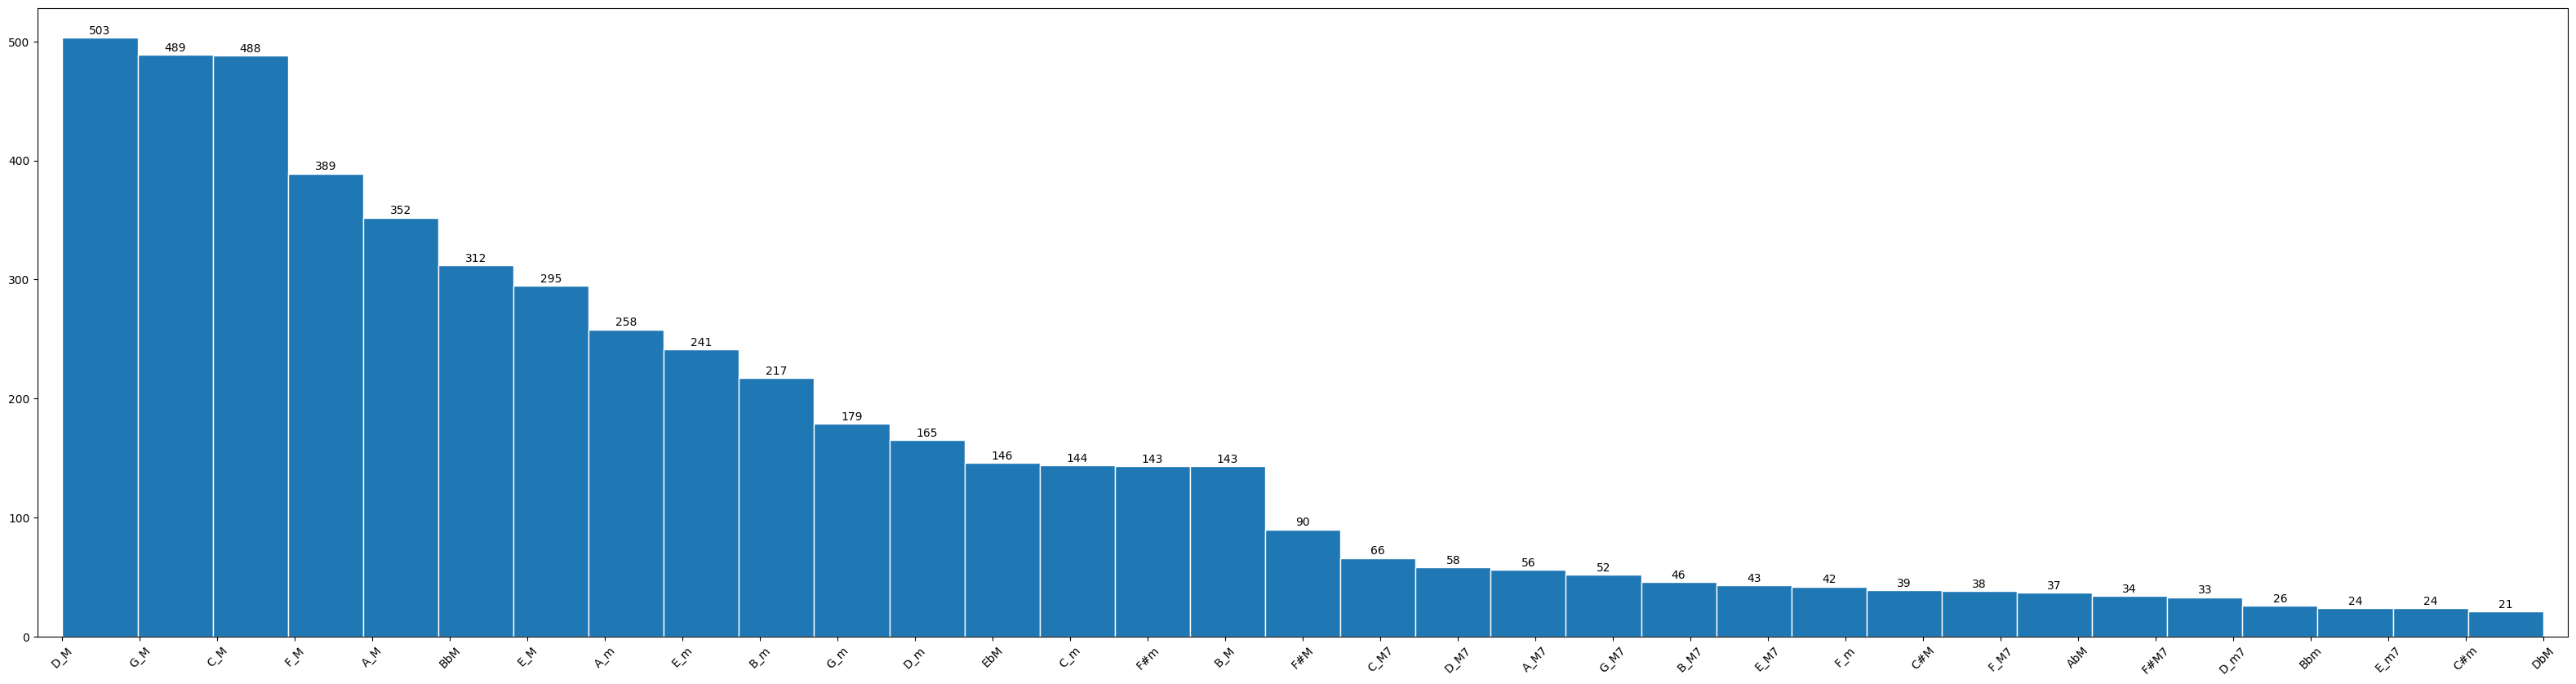

In [ ]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
plt.margins(x=0.01)
freq, bins, _ = plt.hist(pd.Series(plt_array), edgecolor='white', bins=pd.Series(plt_array).unique().size)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,1),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

X_resampled, y_resampled = ros.fit_resample(X, Y)

In [ ]:
y_resampled.shape

(5675,)

In [ ]:
plt_array = y_resampled.tolist()
sortByFrequency(plt_array, len(plt_array))

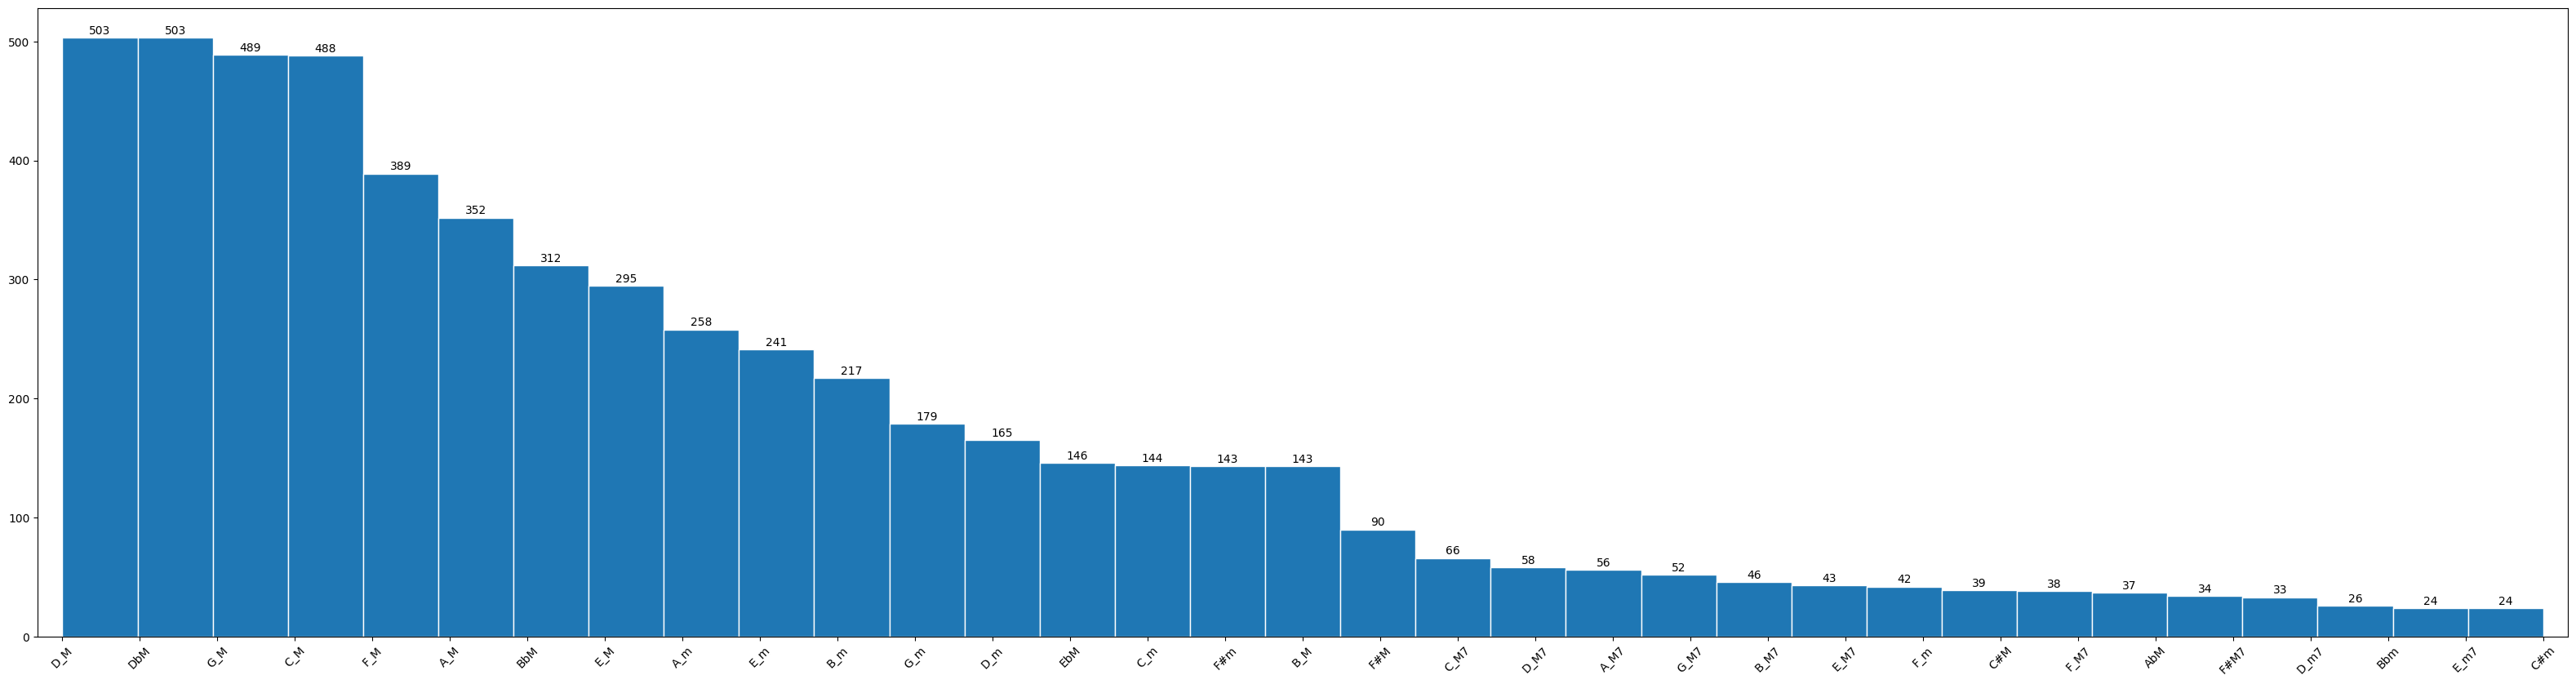

In [ ]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
plt.margins(x=0.01)
freq, bins, _ = plt.hist(pd.Series(plt_array), edgecolor='white', bins=pd.Series(plt_array).unique().size)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,1),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
plt.show()

In [ ]:
df.shape

(5193, 17)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/IP/Project/Classification_data_trimmed.csv', index=False)